In [8]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time
from tqdm import tqdm
import itertools

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA


## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import scipy.signal as signal
train_data = pd.read_csv('new4.csv')

In [9]:
train_data.head()

,carid,mileage,color,cityId,transferCount,seatings,licenseYear,TransferAge,country,displacement,...,anonymousFeature6,anonymousFeature8,anonymousFeature9,anonymousFeature10,anonymousFeature11,anonymousFeature12_1,anonymousFeature12_2,anonymousFeature12_3,anonymousFeature14,price
0,1,4.01,1,1,0,5,2018,3.421918,3,1.5,...,1,1,5,2,1.0,4220,1740,1625,1,424.0
1,2,8.60,1,2,0,5,2017,4.265753,5,1.2,...,2,2,4,3,3.0,4630,1775,1480,2,738.0
2,5,15.56,1,2,0,5,2008,13.317808,5,1.6,...,2,2,4,3,3.0,4515,1725,1445,2,100.0
3,6,6.04,1,3,3,5,2016,4.805479,3,1.3,...,1,2,5,2,1.0,4500,1834,1707,2,438.0
4,7,5.70,4,1,2,5,2012,8.843836,5,2.0,...,1,1,5,2,1.0,4315,1783,1606,1,590.0


In [10]:
train_data.columns

Index(['carid', 'mileage', 'color', 'cityId', 'transferCount', 'seatings',
       'licenseYear', 'TransferAge', 'country', 'displacement', 'gearbox',
       'oiltype', 'newprice', 'brand_carCode_maketype',
       'serial_model_modelyear', 'anonymousFeature1', 'anonymousFeature2',
       'anonymousFeature3', 'anonymousFeature4', 'anonymousFeature5',
       'anonymousFeature6', 'anonymousFeature8', 'anonymousFeature9',
       'anonymousFeature10', 'anonymousFeature11', 'anonymousFeature12_1',
       'anonymousFeature12_2', 'anonymousFeature12_3', 'anonymousFeature14',
       'price'],
      dtype='object')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carid                   30000 non-null  int64  
 1   mileage                 30000 non-null  float64
 2   color                   30000 non-null  int64  
 3   cityId                  30000 non-null  int64  
 4   transferCount           30000 non-null  int64  
 5   seatings                30000 non-null  int64  
 6   licenseYear             30000 non-null  int64  
 7   TransferAge             30000 non-null  float64
 8   country                 30000 non-null  int64  
 9   displacement            30000 non-null  float64
 10  gearbox                 30000 non-null  int64  
 11  oiltype                 30000 non-null  int64  
 12  newprice                30000 non-null  float64
 13  brand_carCode_maketype  30000 non-null  int64  
 14  serial_model_modelyear  30000 non-null

In [12]:

train_data['brand_carCode_maketype'] = data['brand_carCode_maketype'].astype('int')
train_data['serial_model_modelyear'] = data['serial_model_modelyear'].astype('int')
                   

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carid                   30000 non-null  int64  
 1   mileage                 30000 non-null  float64
 2   color                   30000 non-null  int64  
 3   cityId                  30000 non-null  int64  
 4   transferCount           30000 non-null  int64  
 5   seatings                30000 non-null  int64  
 6   licenseYear             30000 non-null  int64  
 7   TransferAge             30000 non-null  float64
 8   country                 30000 non-null  int64  
 9   displacement            30000 non-null  float64
 10  gearbox                 30000 non-null  int64  
 11  oiltype                 30000 non-null  int64  
 12  newprice                30000 non-null  float64
 13  brand_carCode_maketype  30000 non-null  int32  
 14  serial_model_modelyear  30000 non-null

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders.target_encoder import TargetEncoder
import numpy as np
import pandas as pd
X = train_data.drop(['carid', 'price'], axis=1)
y = train_data['carid']
enc = TargetEncoder(cols=[ 'mileage', 'color', 'cityId', 'transferCount', 'seatings',
       'licenseYear', 'TransferAge', 'country', 'displacement', 'gearbox',
       'oiltype', 'newprice' , 'anonymousFeature1', 'anonymousFeature2',
       'anonymousFeature3', 'anonymousFeature4', 'anonymousFeature5',
       'anonymousFeature6', 'anonymousFeature8', 'anonymousFeature9',
       'anonymousFeature10', 'anonymousFeature11', 'anonymousFeature12_1',
       'anonymousFeature12_2', 'anonymousFeature12_3', 'anonymousFeature14'])
te = enc.fit_transform(X, y)


In [15]:
te.head()

,mileage,color,cityId,transferCount,seatings,licenseYear,TransferAge,country,displacement,gearbox,...,anonymousFeature5,anonymousFeature6,anonymousFeature8,anonymousFeature9,anonymousFeature10,anonymousFeature11,anonymousFeature12_1,anonymousFeature12_2,anonymousFeature12_3,anonymousFeature14
0,34796.791667,37425.599557,37223.922546,36927.076133,37036.479713,37631.632329,23626.621240,36400.088629,35342.736080,35089.606796,...,36261.494565,36894.157930,37399.618450,37175.111246,37504.960186,36700.110228,42422.578947,38677.347368,38659.098901,37011.290049
1,42042.685988,37425.599557,22221.810440,36927.076133,37036.479713,37280.652601,20146.725237,37546.368826,38726.921053,40233.340812,...,35445.653680,37309.626879,36668.225187,37071.164361,36701.247595,37516.984784,41434.449086,35709.019048,37882.607918,37251.205146
2,21759.266039,37425.599557,22221.810440,36927.076133,37036.479713,35553.441048,11887.050993,37546.368826,37210.712804,35109.906826,...,38397.825189,37309.626879,36668.225187,37071.164361,36701.247595,37516.984784,39448.720497,38413.505682,39595.589577,37251.205146
3,22457.454545,37425.599557,32677.909040,37003.246602,37036.479713,37271.226577,30346.112789,36400.088629,36166.980247,40233.340812,...,33087.581006,36894.157930,36668.225187,37175.111246,37504.960186,36700.110228,35505.563910,37119.196491,41568.136360,37251.205146
4,40357.468750,37857.125169,37223.922546,37373.203650,37036.479713,35733.054896,20171.406806,37546.368826,37996.539203,35233.228723,...,39648.185374,36894.157930,37399.618450,37175.111246,37504.960186,36700.110228,38464.614286,37198.927536,38052.637681,37011.290049


In [17]:
train_data.head()

,carid,mileage,color,cityId,transferCount,seatings,licenseYear,TransferAge,country,displacement,...,anonymousFeature6,anonymousFeature8,anonymousFeature9,anonymousFeature10,anonymousFeature11,anonymousFeature12_1,anonymousFeature12_2,anonymousFeature12_3,anonymousFeature14,price
0,1,4.01,1,1,0,5,2018,3.421918,3,1.5,...,1,1,5,2,1.0,4220,1740,1625,1,424.0
1,2,8.60,1,2,0,5,2017,4.265753,5,1.2,...,2,2,4,3,3.0,4630,1775,1480,2,738.0
2,5,15.56,1,2,0,5,2008,13.317808,5,1.6,...,2,2,4,3,3.0,4515,1725,1445,2,100.0
3,6,6.04,1,3,3,5,2016,4.805479,3,1.3,...,1,2,5,2,1.0,4500,1834,1707,2,438.0
4,7,5.70,4,1,2,5,2012,8.843836,5,2.0,...,1,1,5,2,1.0,4315,1783,1606,1,590.0


In [32]:
from sklearn.preprocessing import MinMaxScaler
#特征归一化
X = te
y = train_data['price'] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(pd.concat([te]).values)
all_data = min_max_scaler.transform(pd.concat([te]).values)

In [38]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=28)
all_pca = pca.fit_transform(all_data)
X_pca = all_pca[:len(X_train)]
test = all_pca[len(X_train):]
y = train_data['price'].values

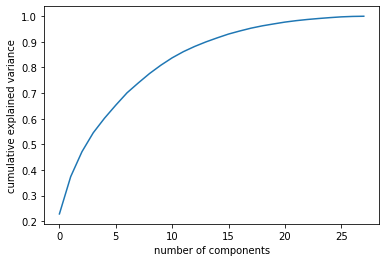

In [39]:
import numpy as np 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
# # 6.MLP导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
train_data = pd.read_csv('new2.csv')
#PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
#多元线性回归分析
train_xadd = sm.add_constant(X_train)  ## 添加常数项
lm = sm.OLS(y_train,train_xadd).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7821
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.786
Time:                        02:55:16   Log-Likelihood:            -2.8377e+05
No. Observations:               22500   AIC:                         5.676e+05
Df Residuals:                   22471   BIC:                         5.678e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.642e+05   6.04e+05     -0.437      0.662   -1.45e+06     9.2e+05
mileage                   -0.2233      0.087     -2.553      0.011      -0.395      -0.052
color                      0.9017      0.577      1.563      0.118      -0.229       2.032
cityId                     0.0046      0.208      0.022      0.982      -0.402       0.411
transferCount             -0.7232      1.436     -0.503      0.615      -3.539       2.092
seatings                  -0.2050      0.790     -0.259      0.795      -1.753       1.343
licenseYear                0.1100      0.712      0.155      0.877      -1.285       1.505
TransferAge                0.0393      0.065      0.608      0.543      -0.087       0.166
country                    0.0988      0.585      0.169      0.866      -1.047       1.245
displacement               0.3420      0.350      0.976      0.329      -0.345       1.029
gearbox                   -0.1540      0.270     -0.569      0.569      -0.684       0.376
oiltype                    0.0522      1.547      0.034      0.973      -2.981       3.085
newprice                   0.0769      0.048      1.591      0.112      -0.018       0.172
brand_carCode_maketype     0.0682      0.283      0.241      0.809      -0.487       0.623
serial_model_modelyear  3.099e-08    4.3e-07      0.072      0.943   -8.12e-07    8.74e-07
anonymousFeature1          3.1967     15.868      0.201      0.840     -27.906      34.299
anonymousFeature2         -0.0961      0.411     -0.234      0.815      -0.902       0.710
anonymousFeature3          0.1917      1.018      0.188      0.851      -1.803       2.186
anonymousFeature4         -0.1523      0.077     -1.968      0.049      -0.304      -0.001
anonymousFeature5          0.1740      0.191      0.909      0.363      -0.201       0.549
anonymousFeature6         -0.5325      0.996     -0.535      0.593      -2.484       1.419
anonymousFeature8          0.1780      0.435      0.409      0.683      -0.675       1.032
anonymousFeature9         -0.2465      1.402     -0.176      0.861      -2.995       2.502
anonymousFeature10         1.1777      1.258      0.936      0.349      -1.289       3.644
anonymousFeature11        -0.0941      0.584     -0.161      0.872      -1.239       1.051
anonymousFeature12_1       0.0991      0.083      1.193      0.233      -0.064       0.262
anonymousFeature12_2      -0.0075      0.121     -0.062      0.951      -0.245       0.230
anonymousFeature12_3      -0.0330      0.100     -0.332      0.740      -0.228       0.162
anonymousFeature14         2.9932      3.111      0.962      0.336      -3.104       9.090
==============================================================================
Omnibus:                   101190.912   Durbin-Watson:                   2.001
Prob(Omnibus)

In [41]:
#检查模型再测试集上的预测效果
test_xadd = sm.add_constant(X_test)  ## 添加常数项
pre_y = lm.predict(test_xadd)
print("mean absolute error:", metrics.mean_absolute_error(y_test,pre_y))
print("mean squared error:", metrics.mean_squared_error(y_test,pre_y))

mean absolute error: 1946.229425008506
mean squared error: 7500239.835989022


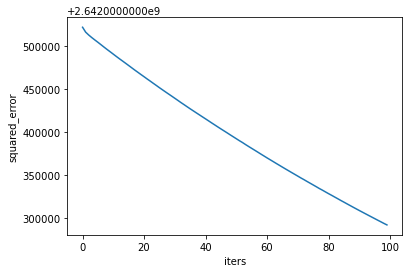

In [42]:
## 定义含有4个隐藏层的MLP网络
mlpr = MLPRegressor(hidden_layer_sizes=(1000,1000,300,100), ## 隐藏层的神经元个数
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=100, 
                    random_state=123,
#                     early_stopping=True, ## 是否提前停止训练
#                     validation_fraction=0.2, ## 20%作为验证集
#                     tol=1e-8,
                   )

## 拟合训练数据集
mlpr.fit(X_train,y_train)

## 可视化损失函数
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()

In [43]:
# 相对误差
def mean_relative_error(y_true, pre_y,):
    import numpy as np
    relative_error = np.average(np.abs(y_true - y_pred) / y_true, axis=0)
    return relative_error

In [64]:
## 对测试集上进行预测
pre_y = mlpr.predict(X_test)
print("mean absolute error:", metrics.mean_absolute_error(y_test,pre_y))
print("mean squared error:", metrics.mean_squared_error(y_test,pre_y))
## 输出在测试集上的R^2
print("在训练集上的R^2:",mlpr.score(X_train,y_train))
print("在测试集上的R^2:",mlpr.score(X_test,y_test))

mean absolute error: 1345.7590486491708
mean squared error: 5088130.608378811
在训练集上的R^2: -0.0006078852603135232
在测试集上的R^2: -0.5949277344201271


In [65]:
import csv
test_data = pd.read_csv('new2.csv')
XX = test_data.drop(['carid', 'price'], axis=1)
yy = test_data['carid']
pre_y = mlpr.predict(XX)
# 结果输出
with open('result.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the data
    writer.writerow(pre_y)

ValueError: X has 44 features, but MLPRegressor is expecting 28 features as input.

In [ ]:
import csv
test_data = pd.read_csv('new2.csv')
XX = test_data.drop(['carid', 'price'], axis=1)
yy = test_data['carid']
pre_y = mlpr.predict(XX)
# 结果输出
with open('result.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the data
    writer.writerow(pre_y)